In [1]:
#Importing all the relavemt libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import seaborn as sns
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import precision_score, recall_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm


In [3]:
lead = pd.read_csv('/Users/guala/Downloads/Lead Scoring Assignment/Leads.csv')
lead.head() 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead.shape

(9240, 37)

In [5]:
lead.columns


Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
### Inferences:
#We can see that there are some outliers present in a few columns like: Total Visits, Total time spent on website


In [9]:
#Checking for null values

In [10]:
# Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

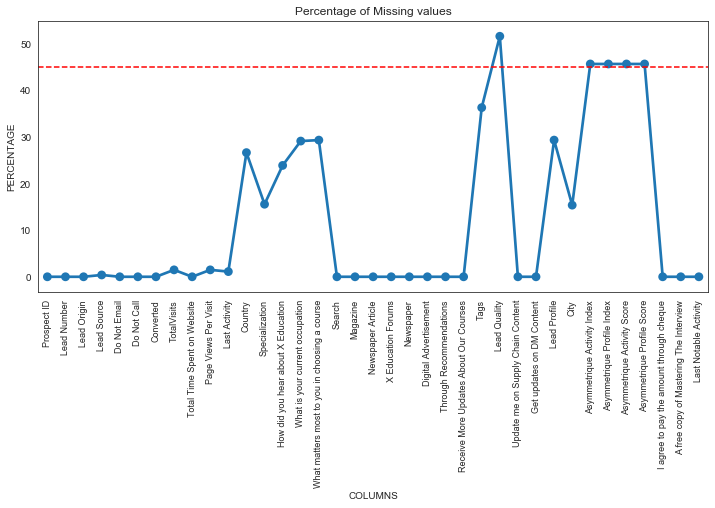

In [11]:
#plotting the null value percentage
sns.set_style("white")
fig = plt.figure(figsize=(12,5))
null_lead = pd.DataFrame((lead.isnull().sum())*100/lead.shape[0]).reset_index()
ax = sns.pointplot("index",0,data=null_lead)
plt.xticks(rotation =90,fontsize =9)
ax.axhline(45, ls='--',color='red')
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()


In [12]:
##Missing Value treatment
lead.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,...,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,...,1,6,7,3,3,NaN,NaN,1,2,16
top,c84883c2-9618-4873-8cf7-561a92ee72db,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,...,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,...,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,...,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,...,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [13]:
print(lead.Country.unique())

[nan 'India' 'Russia' 'Kuwait' 'Oman' 'United Arab Emirates'
 'United States' 'Australia' 'United Kingdom' 'Bahrain' 'Ghana'
 'Singapore' 'Qatar' 'Saudi Arabia' 'Belgium' 'France' 'Sri Lanka' 'China'
 'Canada' 'Netherlands' 'Sweden' 'Nigeria' 'Hong Kong' 'Germany'
 'Asia/Pacific Region' 'Uganda' 'Kenya' 'Italy' 'South Africa' 'Tanzania'
 'unknown' 'Malaysia' 'Liberia' 'Switzerland' 'Denmark' 'Philippines'
 'Bangladesh' 'Vietnam' 'Indonesia']


In [14]:
print(lead['City'].unique())


['Select' 'Mumbai' nan 'Thane & Outskirts' 'Other Metro Cities'
 'Other Cities' 'Other Cities of Maharashtra' 'Tier II Cities']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text xticklabel objects>)

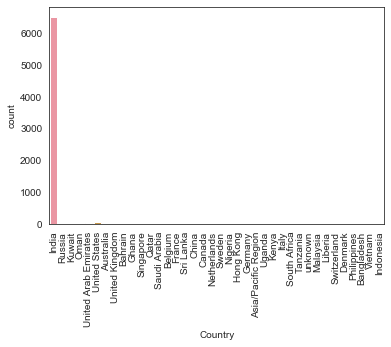

In [15]:
sns.countplot(lead.Country)
xticks(rotation = 90)


In [16]:
## More than 90% of the value is India so we can safely remove this column

lead = lead.drop('Country',axis=1)


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

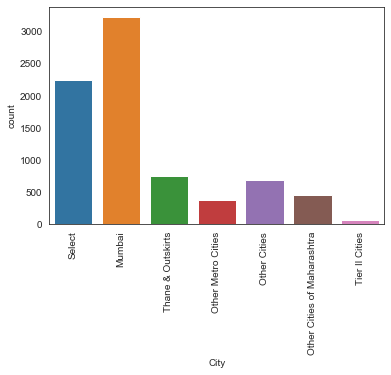

In [17]:
sns.countplot(lead.City)
xticks(rotation = 90)


In [18]:
## Select values and null values for City can be imputed as Mumbai

lead['City'] = lead['City'].fillna(lead['City'].mode()[0])
lead['City'] = lead['City'].replace("Select", "Mumbai")

In [19]:
# Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

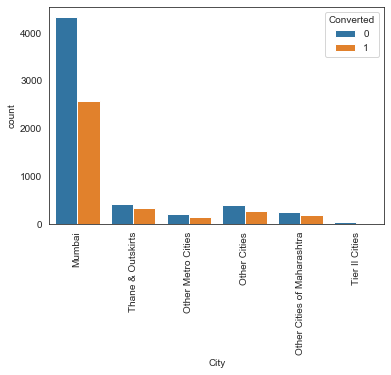

In [20]:
sns.countplot(x = "City", hue = "Converted", data = lead)
xticks(rotation = 90)

# Majority Conversion is also from Mumbai


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

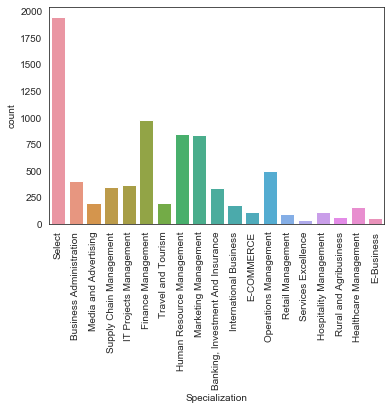

In [21]:
sns.countplot(lead['Specialization'])
xticks(rotation = 90)

In [22]:
## Specialization has almost 1750 select values and apart from this 15% null values
## What we can do about this create a category of others for Students or misc.

lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')
lead['Specialization'] = lead['Specialization'].replace("Select", "Others")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

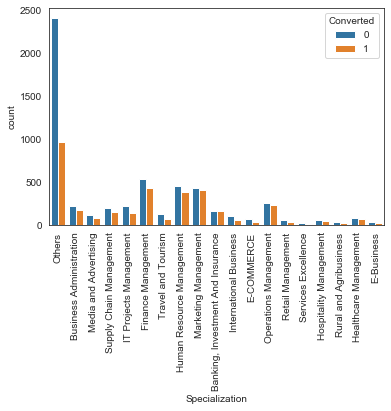

In [23]:
sns.countplot(x = "Specialization", hue = "Converted", data = lead)
xticks(rotation = 90)

# Majority Conversion Data is from Others


In [24]:
# Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

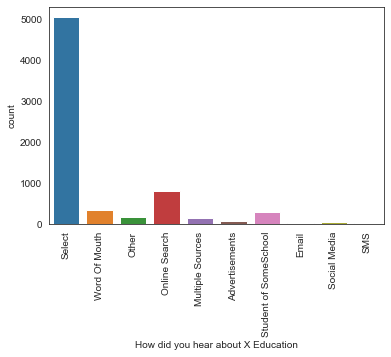

In [25]:
sns.countplot(lead['How did you hear about X Education'])
xticks(rotation = 90)


In [26]:
## Column "How did you hear about X Education" column can be dropped as most of the values are select and 23% are null values apart from select

lead = lead.drop('How did you hear about X Education',axis=1)

In [27]:
# Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

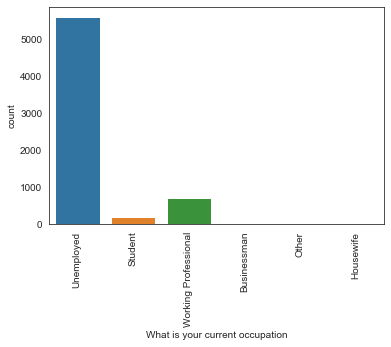

In [28]:
sns.countplot(lead['What is your current occupation'])
xticks(rotation = 90)


In [29]:
## Most of the values are unemployed so null values can be imputed as unemployed

lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

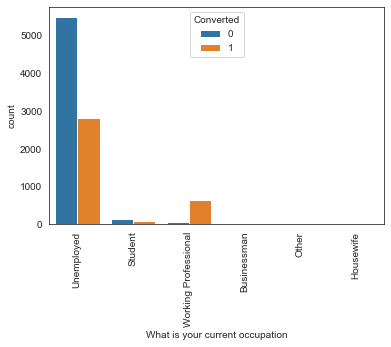

In [30]:
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead)
xticks(rotation = 90)

# Max Conversion is from Unemployed, but the ratio of being converted is better in Working Professionals


In [31]:
# Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

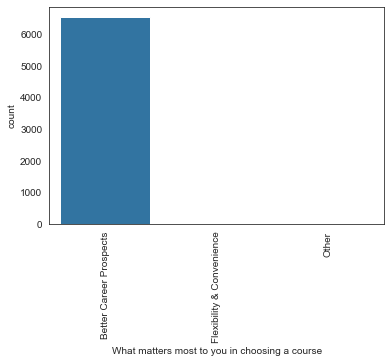

In [32]:
sns.countplot(lead['What matters most to you in choosing a course'])
xticks(rotation = 90)


In [33]:
# Since majority data (more than 80% is for Better Career Prospect, if we impute this then it will be more than 90%) so it is safe to drop this column

lead = lead.drop('What matters most to you in choosing a course', axis=1)


In [34]:
# Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                               0.00
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

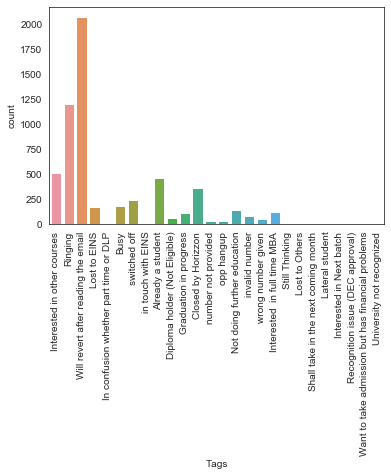

In [35]:
sns.countplot(lead['Tags'])
xticks(rotation = 90)

In [36]:
# Since most frequent option is Will Revert after reading the email, we can impute the mode in this case:

lead['Tags'] = lead['Tags'].fillna(lead['Tags'].mode()[0])


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

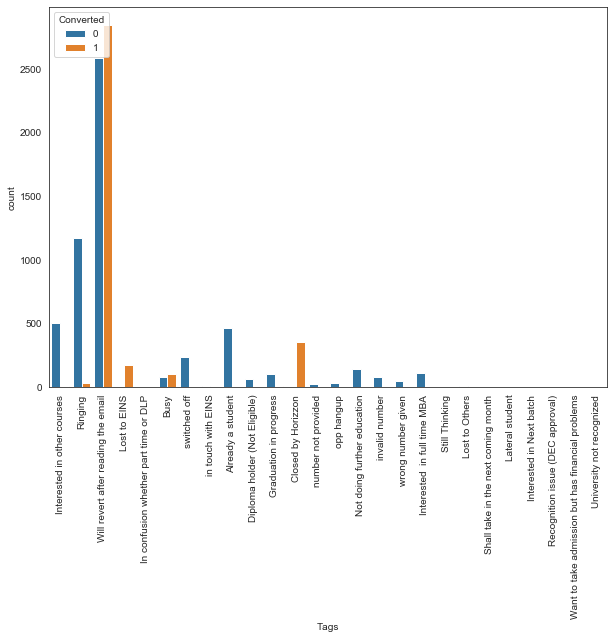

In [37]:
plt.figure(figsize=(10,7))
sns.countplot(x = "Tags", hue = "Converted", data = lead
             )
xticks(rotation = 90)
# We can see that conversion rate of the above imputed option is highest


In [38]:
# Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                               0.00
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

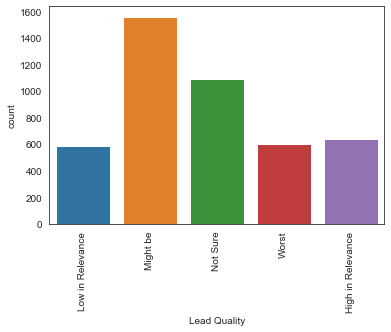

In [39]:
sns.countplot(lead['Lead Quality'])
xticks(rotation = 90)


In [40]:
# Lead Quality seems an important parameter as per the business so instead of dropping this we can impute the values to  not sure since whoever was filling the form did not mention explicitly

lead['Lead Quality'] = lead['Lead Quality'].replace(np.nan, 'Not Sure')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

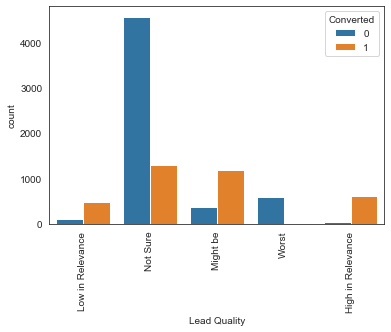

In [41]:
sns.countplot(x = "Lead Quality", hue = "Converted", data = lead)
xticks(rotation = 90)

# Low, High in relevance have a better converion ratio but Might be have the most conversions

In [42]:
# Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                               0.00
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

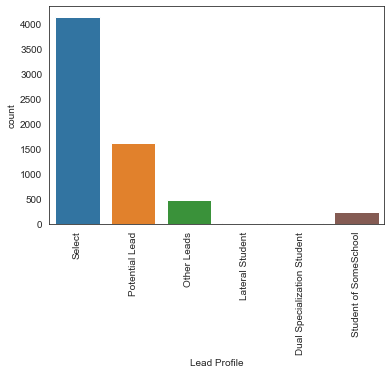

In [43]:
sns.countplot(lead['Lead Profile'])
xticks(rotation = 90)


In [44]:
# Lead Profile already has 4000 select values and then 29% null values which makes this column useless, so its safe to drop it

lead = lead.drop('Lead Profile',axis=1)

In [45]:
# Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)


Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                               0.00
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

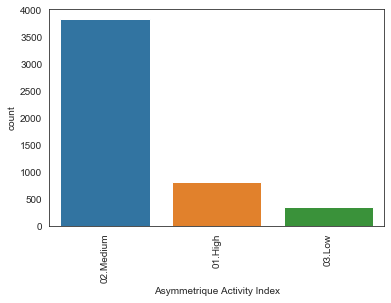

In [46]:
 sns.countplot(lead['Asymmetrique Activity Index'])
xticks(rotation = 90)


In [47]:
# For this column we can impute the null values to 02.Medium

lead['Asymmetrique Activity Index'] = lead['Asymmetrique Activity Index'].fillna(lead['Asymmetrique Activity Index'].mode()[0])


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

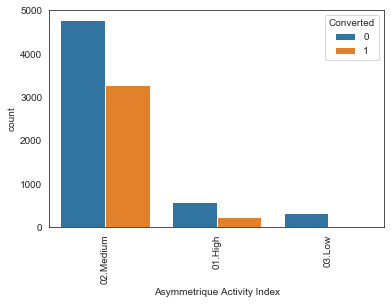

In [48]:
sns.countplot(x = "Asymmetrique Activity Index", hue = "Converted", data = lead)
xticks(rotation = 90)


In [49]:
# Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)


Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                               0.00
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

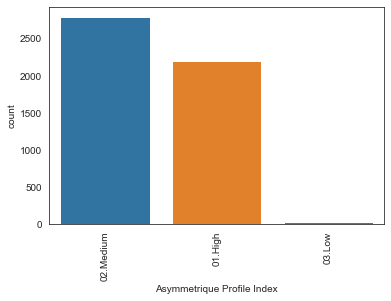

In [50]:
sns.countplot(lead['Asymmetrique Profile Index'])
xticks(rotation = 90)


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

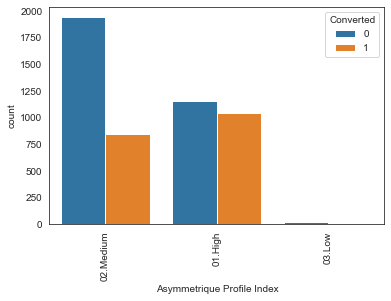

In [51]:
sns.countplot(x = "Asymmetrique Profile Index", hue = "Converted", data = lead)
xticks(rotation = 90)

In [52]:
# We can not deduce any analysis from this column and since the null values are high we can safely drop this column

lead = lead.drop('Asymmetrique Profile Index',axis=1)

In [53]:
# Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead
                                   .index)), 2)


Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                               0.00
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

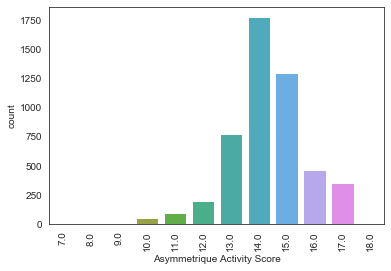

In [54]:
sns.countplot(lead['Asymmetrique Activity Score'])
xticks(rotation = 90)


In [55]:
# Values are too close to be imputed in this case and the number of null values is not small, we can drop this column

lead = lead.drop('Asymmetrique Activity Score',axis=1)

In [56]:
# Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)


Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                               0.00
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

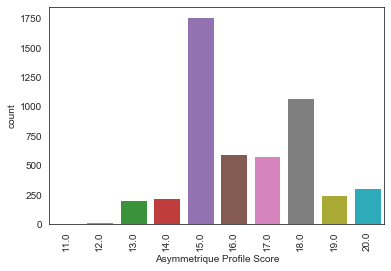

In [57]:
sns.countplot(lead['Asymmetrique Profile Score'])
xticks(rotation = 90)


In [58]:
# Values are too close to be imputed in this case and the number of null values is not small, we can drop this column

lead = lead.drop('Asymmetrique Profile Score',axis=1)

In [59]:
# Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

In [60]:
## For Lead Source, Last Activity, Page Views per Visit, Total visits we can drop 
##those rows which contain null values since the number of missing values is less

lead = lead.dropna()

In [61]:
# Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)


Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

In [62]:
Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted



37.85541106458012

In [63]:
lead.shape


(9074, 30)

In [64]:
##Univariate Analysis


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

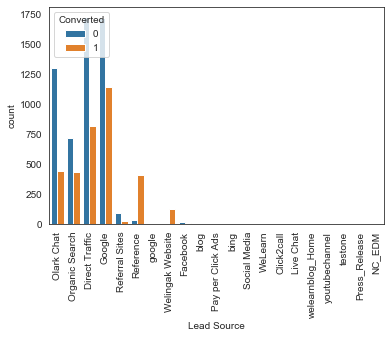

In [65]:
sns.countplot(x = "Lead Source", hue = "Converted", data = lead)
xticks(rotation = 90)


In [66]:
## We can club the values which do not have a considerable impact on Lead Source

lead['Lead Source'] = lead['Lead Source'].replace(['Pay per Click Ads','bing','blog','Social Media','WeLearn','Click2call','Live Chat','welearnblog_Home',
                                               'youtubechannel','testone','Press_Release','NC_EDM'], 'Others')

lead.loc[(lead['Lead Source'] == 'google'),'Lead Source'] = 'Google'

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

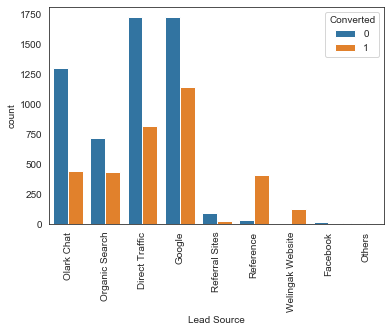

In [67]:
sns.countplot(x = "Lead Source", hue = "Converted", data = lead)
xticks(rotation = 90)


(array([0, 1]), <a list of 2 Text xticklabel objects>)

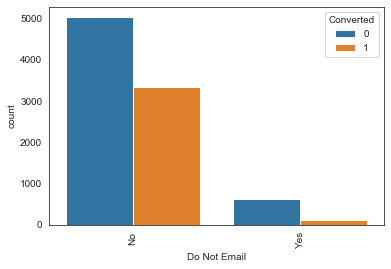

In [68]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead)
xticks(rotation = 90)

# We can see that There is a very small amount of conversion that has happened when this value is Yes

(array([0, 1]), <a list of 2 Text xticklabel objects>)

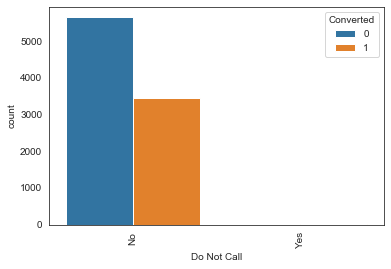

In [69]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead)
xticks(rotation = 90)

# We can see that There is no value of conversion for Yes value of Do not call

(array([0, 1]), <a list of 2 Text xticklabel objects>)

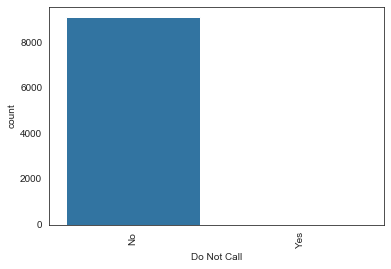

In [70]:
sns.countplot(x = "Do Not Call", data = lead)
xticks(rotation = 90)

In [71]:
# Also we can see that there is no value of Yes in this case so we can drop this column since it does not add any value to the data.

lead = lead.drop('Do Not Call',axis=1)

In [72]:
# Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)


Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                    

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text xticklabel objects>)

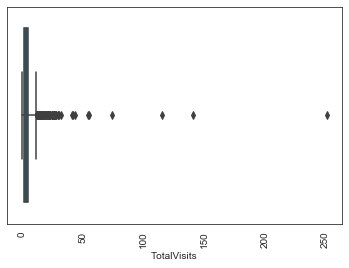

In [73]:
sns.boxplot(x = "TotalVisits", hue = "Converted", data = lead
           
           )
xticks(rotation = 90)

In [74]:
lead['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [75]:
# We can see that there are some outliers present so we can treat these outliers before proceeding further

percentiles = lead['TotalVisits'].quantile([0.05,0.95]).values
lead['TotalVisits'][lead['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead['TotalVisits'][lead['TotalVisits'] >= percentiles[1]] = percentiles[1]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

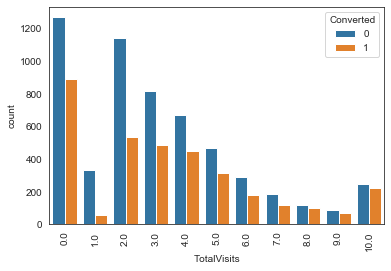

In [76]:
sns.countplot(x = "TotalVisits", hue = "Converted", data = lead
             
             )
xticks(rotation = 90)

# This data could mean that when a user visits the website often the ratio of conversion gets better

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 7 Text xticklabel objects>)

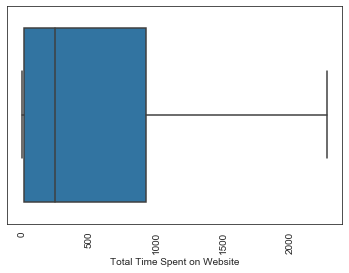

In [77]:
sns.boxplot(x = "Total Time Spent on Website", data = lead
           
           
           
           
           )
xticks(rotation = 90)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 8 Text xticklabel objects>)

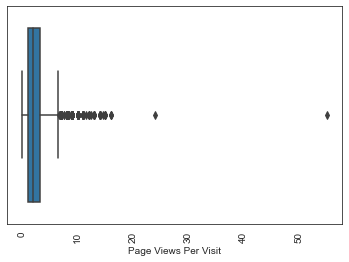

In [78]:
sns.boxplot(x = "Page Views Per Visit",data = lead
           )
xticks(rotation = 90)

In [79]:
## A number of outliers are also present in this case so we can remove these

percentiles = lead['Page Views Per Visit'].quantile([0.05,0.95]).values
lead['Page Views Per Visit'][lead['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead['Page Views Per Visit'][lead['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 9 Text xticklabel objects>)

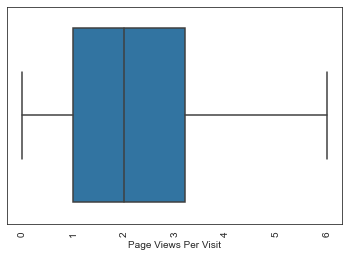

In [80]:
sns.boxplot(x = "Page Views Per Visit",data = lead)
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

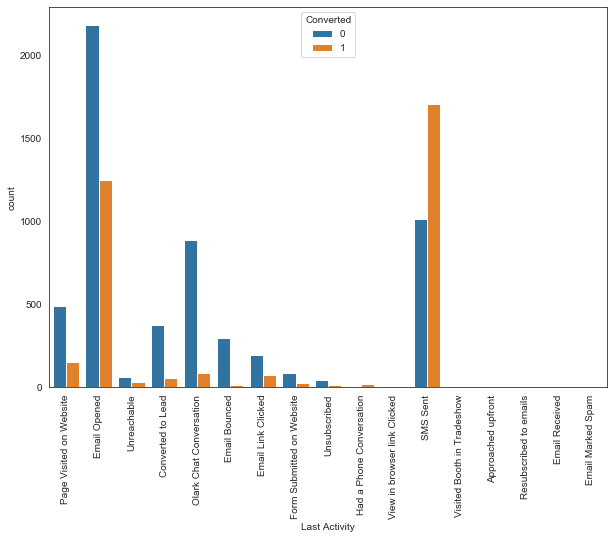

In [81]:
plt.figure(figsize=(10,7))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead)
xticks(rotation = 90)


In [82]:
# We can club calues which have no or very less data

lead['Last Activity'] = lead['Last Activity'].replace(['View in browser link Clicked','Visited Booth in Tradeshow',
                                                   'Approached upfront','Resubscribed to emails','Email Received','Email Marked Spam'], 'Others')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

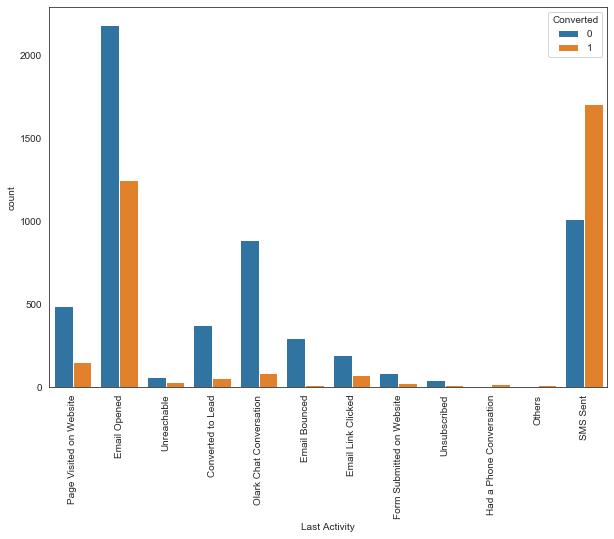

In [83]:
plt.figure(figsize=(10,7))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead)
xticks(rotation = 90)


In [84]:
##Inference
# - Most of the lead have their Email opened as their last activity.
# - Conversion rate for leads with last activity as SMS Sent is almost 60%.b


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

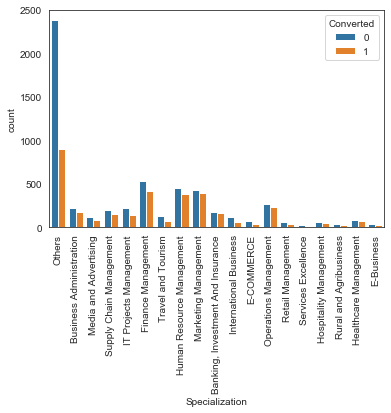

In [85]:
sns.countplot(x = "Specialization", hue = "Converted", data = lead)
xticks(rotation = 90)


In [86]:
# We can club calues which have no or very less data

lead['Specialization'] = lead['Specialization'].replace(['Services Excellence','Retail Management',
                                                   'Hospitality Management','Rural and Agrbusiness','E-Business'], 'Others')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

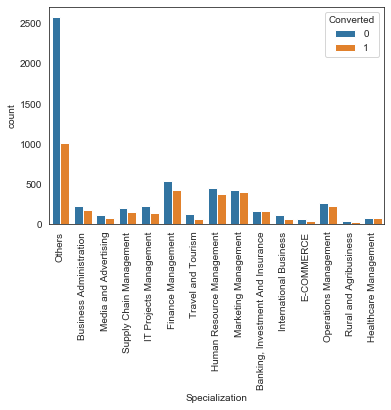

In [87]:
sns.countplot(x = "Specialization", hue = "Converted", data = lead)
xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

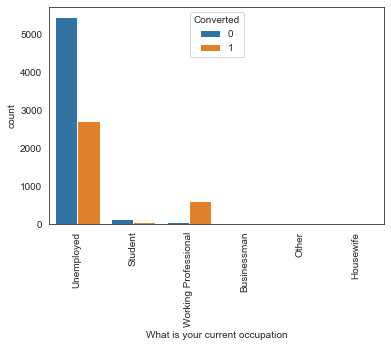

In [88]:
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead)
xticks(rotation = 90)

# From here we can see that most of the people are unemployed and have a good conversion rate, but in case of 
## working professionsals, we can see that the number of conversions is more than not converted

(array([0, 1]), <a list of 2 Text xticklabel objects>)

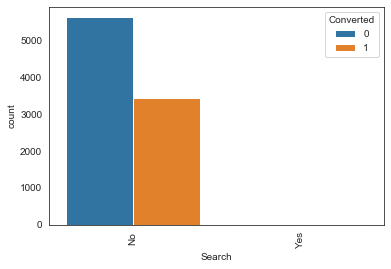

In [89]:
sns.countplot(x = "Search", hue = "Converted", data = lead)
xticks(rotation = 90)


In [90]:
# Since there are no values for Yes we can delete this column as well. As it will not add up to the model

lead = lead.drop('Search',axis=1)

(array([0]), <a list of 1 Text xticklabel objects>)

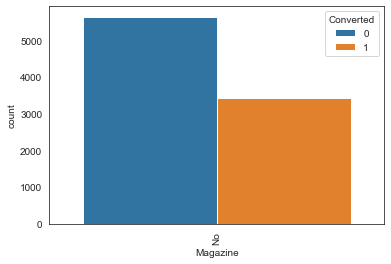

In [91]:
sns.countplot(x = "Magazine", hue = "Converted", data = lead)
xticks(rotation = 90)

(array([0]), <a list of 1 Text xticklabel objects>)

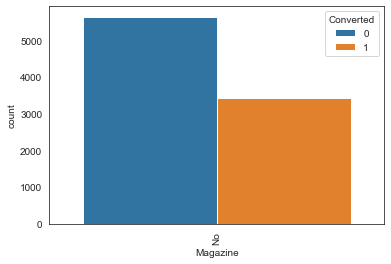

In [92]:
sns.countplot(x = "Magazine", hue = "Converted", data = lead)
xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

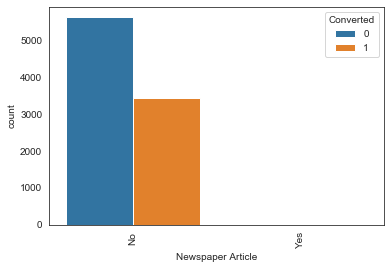

In [93]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead)
xticks(rotation = 90)

In [94]:
# We can drop this column as well as there are no values in yes counterpart so it wont add value to the data

lead = lead.drop('Newspaper Article',axis=1)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

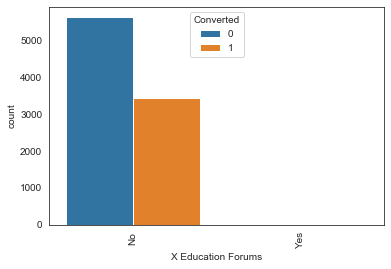

In [95]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead)
xticks(rotation = 90)

In [96]:
# We can drop this column as well as there are no values in yes counterpart so it wont add value to the data

lead = lead.drop('X Education Forums',axis=1)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

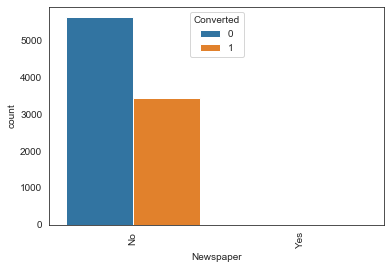

In [97]:
sns.countplot(x = "Newspaper", hue = "Converted", data = lead)
xticks(rotation = 90)


In [98]:
# We can drop this column as well as there are no values in yes counterpart so it wont add value to the data

lead = lead.drop('Newspaper',axis=1)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

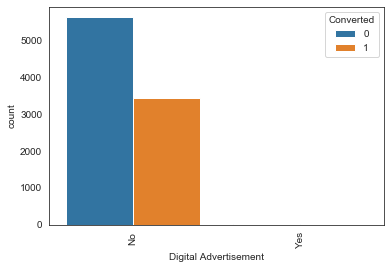

In [99]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead)
xticks(rotation = 90)


In [100]:
# We can drop this column as well as there are no values in yes counterpart so it wont add value to the data

lead = lead.drop('Digital Advertisement',axis=1)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

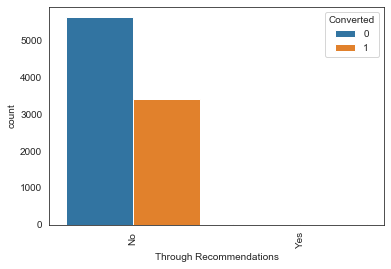

In [101]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead)
xticks(rotation = 90)


In [102]:
# We can drop this column as well as there are no values in yes counterpart so it wont add value to the data

lead = lead.drop('Through Recommendations',axis=1)


(array([0]), <a list of 1 Text xticklabel objects>)

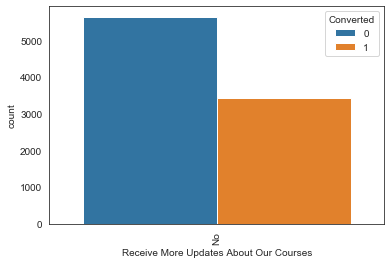

In [103]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead)
xticks(rotation = 90)

In [104]:
# We can drop this column as well as there are no values in yes counterpart so it wont add value to the data

lead = lead.drop('Receive More Updates About Our Courses',axis=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

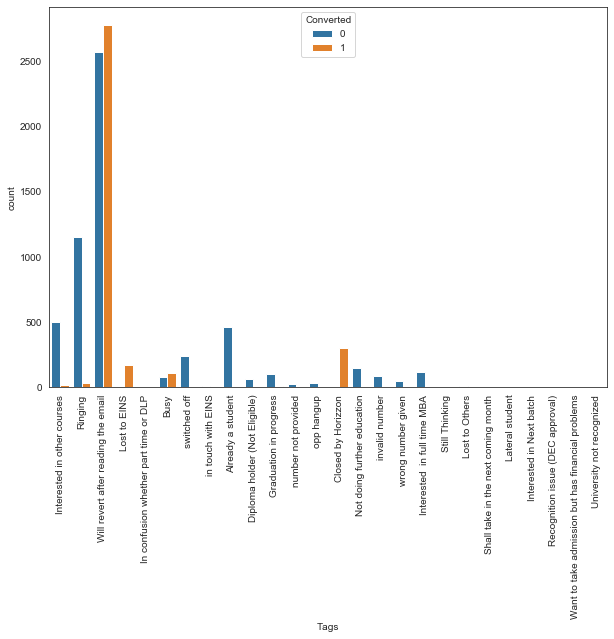

In [105]:
plt.figure(figsize=(10,7))
sns.countplot(x = "Tags", hue = "Converted", data = lead)
xticks(rotation = 90)


In [106]:
# We can club calues which have no or very less data

lead['Tags'] = lead['Tags'].replace(['Still Thinking','Lost to Others',
                                                   'Shall take in the next coming month','Lateral student','Interested in Next batch','in touch with EINS','In confusion whether part time or DLP', 'Recognition issue (DEC approval)','Want to take admission but has financial problems','University not recognized','opp hangup','number not provided'], 'Others')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

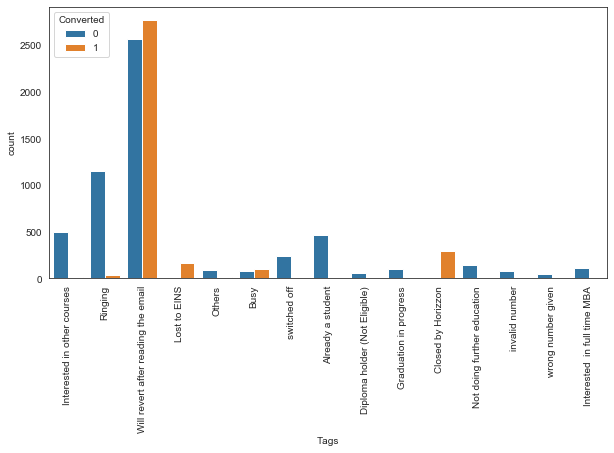

In [107]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Tags", hue = "Converted", data = lead)
xticks(rotation = 90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

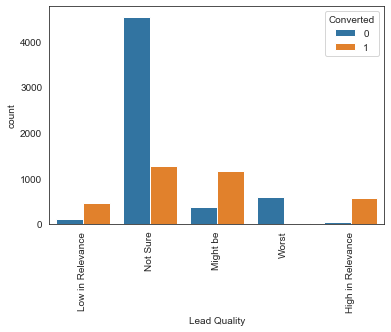

In [108]:
sns.countplot(x = "Lead Quality", hue = "Converted", data = lead)
xticks(rotation = 90)

(array([0]), <a list of 1 Text xticklabel objects>)

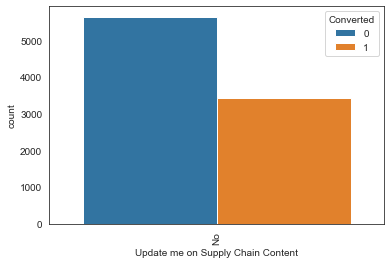

In [109]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead)
xticks(rotation = 90)

In [110]:
# We can drop this variable since there is no data for no

lead = lead.drop('Update me on Supply Chain Content',axis=1)

(array([0]), <a list of 1 Text xticklabel objects>)

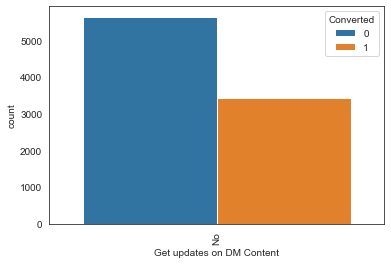

In [111]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead)
xticks(rotation = 90)


In [112]:
# We can drop this variable since there is no data for Get updates on DM Content

lead = lead.drop('Get updates on DM Content',axis=1)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

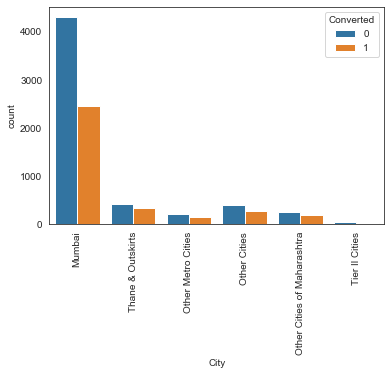

In [113]:
sns.countplot(x = "City", hue = "Converted", data = lead)
xticks(rotation = 90)

# Most of the conversions happened from Mumbai

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

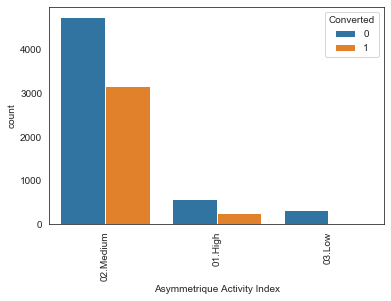

In [114]:
sns.countplot(x = "Asymmetrique Activity Index", hue = "Converted", data = lead)
xticks(rotation = 90)

# Medium activity has most conversions

(array([0]), <a list of 1 Text xticklabel objects>)

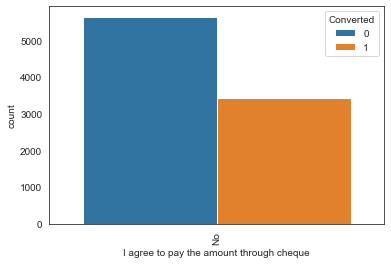

In [115]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead)
xticks(rotation = 90)

In [116]:
# We can drop this variable since there is no data for I agree to pay through cheque

lead = lead.drop('I agree to pay the amount through cheque',axis=1)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

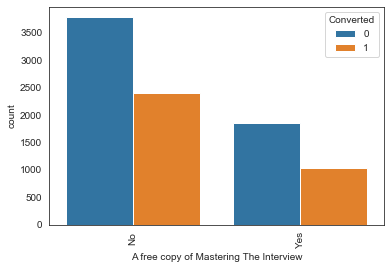

In [117]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead)
xticks(rotation = 90)

# Highest conversion with value no


In [118]:
lead.shape

(9074, 19)

In [119]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Magazine', 'Tags',
       'Lead Quality', 'City', 'Asymmetrique Activity Index',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [120]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Magazine,Tags,Lead Quality,City,Asymmetrique Activity Index,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No,Interested in other courses,Low in Relevance,Mumbai,02.Medium,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No,Ringing,Not Sure,Mumbai,02.Medium,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,Will revert after reading the email,Might be,Mumbai,02.Medium,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Ringing,Not Sure,Mumbai,02.Medium,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No,Will revert after reading the email,Might be,Mumbai,02.Medium,No,Modified


In [121]:
## Now that all of the data cleaning is 
##done we can go ahead and proceed with dummy variable creation

In [122]:
###Dummy Variable Creation


In [123]:
# List of variables to map which are in the form of Yes/No

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview','Magazine']

# Defining the map function
def mapping(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list

lead[varlist] = lead[varlist].apply(mapping)


In [124]:
#For categorical variables with multiple levels, create dummy features (one-hot encoded)¶


In [125]:
# Creating a dummy variable for some of the categorical
#variables and dropping the first one
dum1 = pd.get_dummies(lead[['Lead Origin', 'Lead Source',
        'Last Activity', 'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'City', 'Asymmetrique Activity Index',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

dum1.head()

,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [126]:
# Adding the results to the original dataset
lead = pd.concat([lead, dum1], axis=1)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [127]:
lead = lead.drop(['Lead Origin', 'Lead Source',
        'Last Activity', 'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'City', 'Asymmetrique Activity Index',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],axis=1)

In [128]:
lead.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Magazine,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,1.0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428,1.0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [129]:
lead = lead.drop('Lead Number',axis=1)
# Dropping Lead number since both prospect id and Lead Number are unique we can keep just one column


In [130]:
lead.head()



,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Magazine,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [131]:
##Performing Test-Train Split

In [132]:
X = lead.drop(['Prospect ID','Converted'], axis=1)


In [133]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Magazine,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [134]:
y = lead['Converted']
y.head()


0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [135]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [136]:
##Scaling of the features

In [137]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Magazine,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.432779,-0.160255,-0.155018,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.155018,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,-0.432779,1.643304,-0.155018,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0.643547,2.017593,0.122613,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [138]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Magazine,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.432779,-0.160255,-0.155018,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.155018,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,-0.432779,1.643304,-0.155018,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0.643547,2.017593,0.122613,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [139]:
# Checking the Churn Rate
Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

37.85541106458012

In [140]:
#We have almost 38% conversion



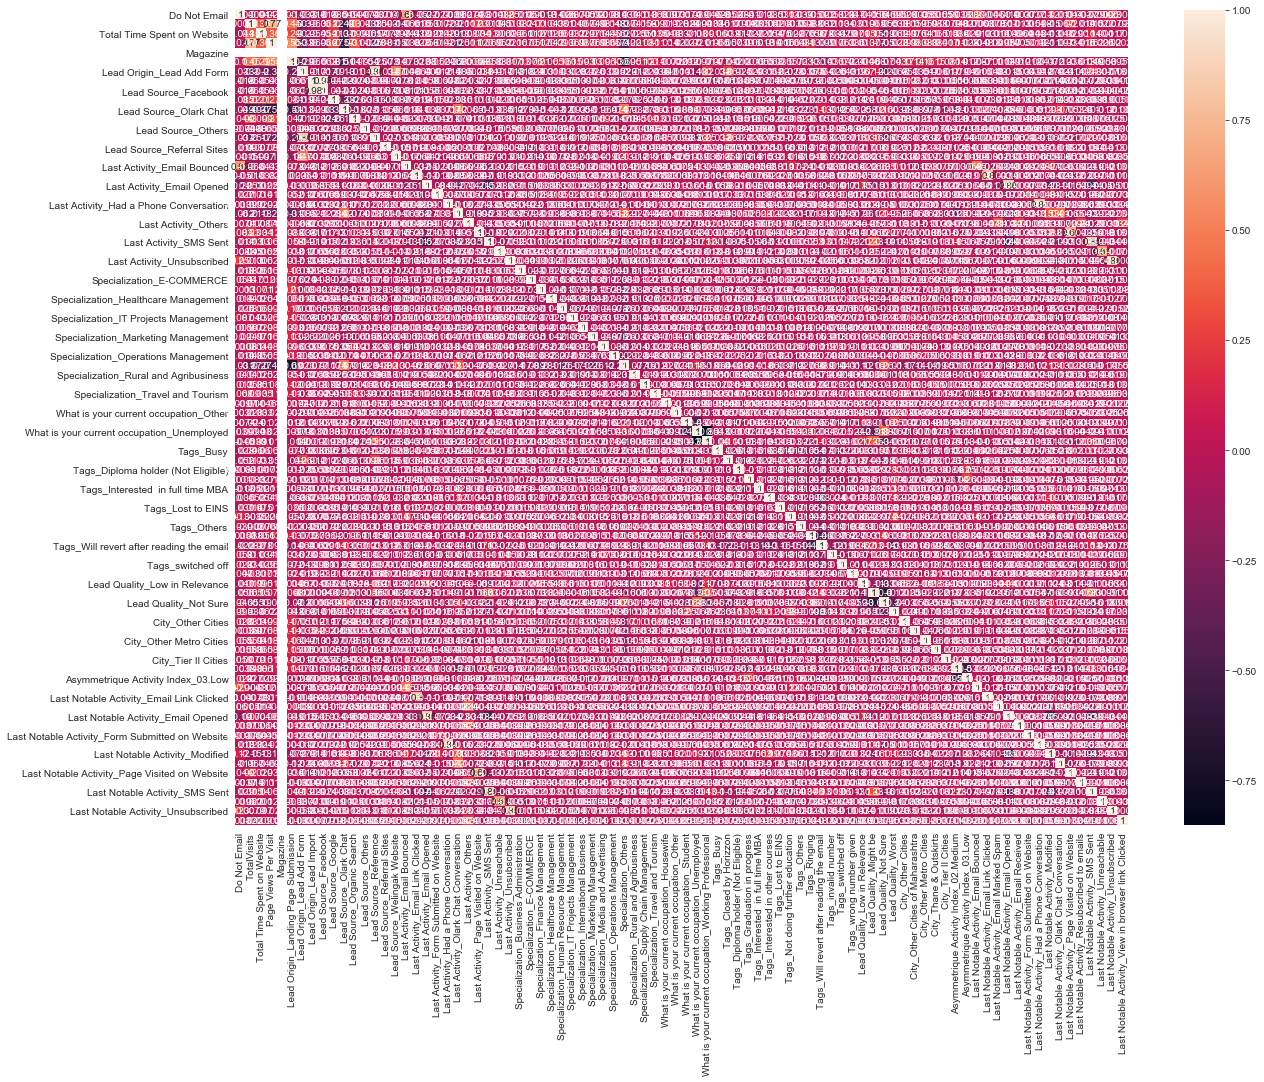

In [141]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [142]:
##Model 1: Using all columns



In [143]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6265
Model Family:                Binomial   Df Model:                           85
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1237.7
Date:                Wed, 27 Jan 2021   Deviance:                       2475.4
Time:                        11:58:13   Pearson chi2:                 3.27e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   22.4327   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Do Not Email                                            -1.3812      0.329     -4.195      0.000      -2.027      -0.736
TotalVisits                                              0.1971      0.087      2.255      0.024       0.026       0.368
Total Time Spent on Website                              1.1489      0.064     17.925      0.000       1.023       1.274
Page Views Per Visit                                    -0.3373      0.100     -3.387      0.001      -0.532      -0.142
Magazine                                             -1.416e-08      0.000     -0.000      1.000      -0.000       0.000
Lead Origin_Landing Page Submission                     -0.8550      0.202     -4.241      0.000      -1.250      -0.460
Lead Origin_Lead Add Form                               -0.3734      1.287     -0.290      0.772      -2.896       2.149
Lead Origin_Lead Import                                 30.0433   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                   -28.9892   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.2102      0.156      1.351      0.177      -0.095       0.515
Lead Source_Olark Chat                                   0.8188      0.237      3.462      0.001       0.355       1.282
Lead Source_Organic Search                               0.2400      0.211      1.138      0.255      -0.173       0.653
Lead Source_Others                                       0.7209      0.813      0.886      0.375      -0.873       2.315
Lead Source_Reference                                    1.7740      1.344      1.320      0.187      -0.861       4.409
Lead Source_Referral Sites                              -0.0935      0.504     -0.186      0.853      -1.081       0.894
Lead Source_Welingak Website                             5.4808      1.490      3.678      0.000       2.560       8.402
Last Activity_Email Bounced                             -0.4925      0.885     -0.557      0.578      -2.226       1.241
Last Activity_Email Link Clicked                         0.8729      0.650      1.343      0.179      -0.401       2.147
Last Activity_Email Opened                               0.0770      0.388      0.198      0.843      -0.683       0.837
Last Activity_Form Submitted on Website                  0.2176      0.617      0.352      0.724      -0.993       1.428
Last Activity_Had a Phone Conversation                   2.8042      5.813      0.482      0.630      -8.588      14.197
Last Activity_Olark Chat Conversation                   -0

In [144]:
##Feature selection using RFE

In [145]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)


In [146]:
rfe.support_

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False,  True, False,
       False,  True,  True,  True,  True,  True, False, False,  True,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False])

In [147]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 41),
 ('Total Time Spent on Website', False, 4),
 ('Page Views Per Visit', False, 40),
 ('Magazine', False, 72),
 ('Lead Origin_Landing Page Submission', False, 19),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Source_Facebook', False, 50),
 ('Lead Source_Google', False, 43),
 ('Lead Source_Olark Chat', False, 6),
 ('Lead Source_Organic Search', False, 44),
 ('Lead Source_Others', False, 49),
 ('Lead Source_Reference', False, 66),
 ('Lead Source_Referral Sites', False, 54),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 32),
 ('Last Activity_Email Link Clicked', False, 39),
 ('Last Activity_Email Opened', False, 64),
 ('Last Activity_Form Submitted on Website', False, 63),
 ('Last Activity_Had a Phone Conversation', False, 16),
 ('Last Activity_Olark Chat Conversation', False, 15),
 ('Last Activity_Others', False, 21),
 ('Last Activity_Page Visited on Web

In [148]:
col = X_train.columns[rfe.support_]
col


Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Asymmetrique Activity Index_03.Low',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [149]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Magazine', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Managemen

In [150]:
##model 2


In [151]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1577.8
Date:                Wed, 27 Jan 2021   Deviance:                       3155.6
Time:                        11:58:18   Pearson chi2:                 3.41e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.5617      0.211     -7.386      0.000      -1.976      -1.147
Do Not Email                                -1.3057      0.214     -6.112      0.000      -1.724      -0.887
Lead Origin_Lead Add Form                    1.1300      0.369      3.064      0.002       0.407       1.853
Lead Source_Welingak Website                 3.4147      0.825      4.141      0.000       1.799       5.031
Tags_Busy                                    3.4784      0.332     10.462      0.000       2.827       4.130
Tags_Closed by Horizzon                      7.7632      0.772     10.050      0.000       6.249       9.277
Tags_Lost to EINS                            9.1261      0.765     11.932      0.000       7.627      10.625
Tags_Ringing                                -2.1415      0.340     -6.298      0.000      -2.808      -1.475
Tags_Will revert after reading the email     3.6757      0.228     16.099      0.000       3.228       4.123
Tags_invalid number                        -23.7101    2.2e+04     -0.001      0.999   -4.31e+04    4.31e+04
Tags_switched off                           -2.8211      0.590     -4.782      0.000      -3.977      -1.665
Tags_wrong number given                    -23.3018   3.12e+04     -0.001      0.999   -6.12e+04    6.12e+04
Lead Quality_Not Sure                       -3.5370      0.127    -27.924      0.000      -3.785      -3.289
Lead Quality_Worst                          -3.9400      0.830     -4.749      0.000      -5.566      -2.314
Asymmetrique Activity Index_03.Low          -1.7065      0.356     -4.798      0.000      -2.404      -1.009
Last Notable Activity_SMS Sent               2.7789      0.122     22.713      0.000       2.539       3.019
============================================================================================================
"""

In [152]:
col1 = col.drop('Tags_invalid number',1)

In [153]:
col1

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Asymmetrique Activity Index_03.Low',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [154]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1584.7
Date:                Wed, 27 Jan 2021   Deviance:                       3169.4
Time:                        11:58:18   Pearson chi2:                 3.35e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.7356      0.215     -8.090      0.000      -2.156      -1.315
Do Not Email                                -1.2932      0.213     -6.075      0.000      -1.710      -0.876
Lead Origin_Lead Add Form                    1.1664      0.371      3.140      0.002       0.438       1.894
Lead Source_Welingak Website                 3.3703      0.825      4.084      0.000       1.753       4.988
Tags_Busy                                    3.6740      0.332     11.076      0.000       3.024       4.324
Tags_Closed by Horizzon                      7.9260      0.773     10.252      0.000       6.411       9.441
Tags_Lost to EINS                            9.2919      0.766     12.136      0.000       7.791      10.793
Tags_Ringing                                -1.9297      0.339     -5.697      0.000      -2.594      -1.266
Tags_Will revert after reading the email     3.8518      0.230     16.714      0.000       3.400       4.303
Tags_switched off                           -2.6031      0.589     -4.419      0.000      -3.758      -1.449
Tags_wrong number given                    -21.0938   1.15e+04     -0.002      0.999   -2.26e+04    2.25e+04
Lead Quality_Not Sure                       -3.5313      0.126    -27.920      0.000      -3.779      -3.283
Lead Quality_Worst                          -3.9560      0.830     -4.763      0.000      -5.584      -2.328
Asymmetrique Activity Index_03.Low          -1.6898      0.356     -4.741      0.000      -2.388      -0.991
Last Notable Activity_SMS Sent               2.7319      0.120     22.703      0.000       2.496       2.968
============================================================================================================
"""

In [155]:
col2 = col1.drop('Tags_wrong number given',1)

In [156]:
col2

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [157]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1587.2
Date:                Wed, 27 Jan 2021   Deviance:                       3174.4
Time:                        11:58:18   Pearson chi2:                 3.36e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.8134      0.214     -8.469      0.000      -2.233      -1.394
Do Not Email                                -1.2922      0.213     -6.080      0.000      -1.709      -0.876
Lead Origin_Lead Add Form                    1.1817      0.373      3.170      0.002       0.451       1.912
Lead Source_Welingak Website                 3.3535      0.826      4.061      0.000       1.735       4.972
Tags_Busy                                    3.7574      0.331     11.363      0.000       3.109       4.405
Tags_Closed by Horizzon                      8.0003      0.773     10.350      0.000       6.485       9.515
Tags_Lost to EINS                            9.3643      0.765     12.235      0.000       7.864      10.864
Tags_Ringing                                -1.8437      0.338     -5.463      0.000      -2.505      -1.182
Tags_Will revert after reading the email     3.9307      0.230     17.100      0.000       3.480       4.381
Tags_switched off                           -2.5154      0.588     -4.276      0.000      -3.668      -1.362
Lead Quality_Not Sure                       -3.5309      0.126    -27.928      0.000      -3.779      -3.283
Lead Quality_Worst                          -3.9310      0.834     -4.716      0.000      -5.565      -2.297
Asymmetrique Activity Index_03.Low          -1.6835      0.357     -4.717      0.000      -2.383      -0.984
Last Notable Activity_SMS Sent               2.7214      0.120     22.709      0.000       2.486       2.956
============================================================================================================
"""

In [158]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]


3009    0.195675
1012    0.062636
9226    0.000755
4750    0.787148
7987    0.982365
1281    0.992145
2880    0.195675
4971    0.756667
7536    0.892574
1248    0.000755
dtype: float64

In [159]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]


array([1.95675439e-01, 6.26359623e-02, 7.55076415e-04, 7.87148120e-01,
       9.82364873e-01, 9.92144665e-01, 1.95675439e-01, 7.56667000e-01,
       8.92574322e-01, 7.55076415e-04])

In [160]:
#Creating a dataframe with the actual churn flag and the predicted probabilities


In [161]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.195675,3009
1,0,0.062636,1012
2,0,0.000755,9226
3,1,0.787148,4750
4,1,0.982365,7987


In [162]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0¶


In [163]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.195675,3009,0
1,0,0.062636,1012,0
2,0,0.000755,9226,0
3,1,0.787148,4750,1
4,1,0.982365,7987,1


In [164]:

# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708

In [165]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3752  153]
 [ 361 2085]]


In [166]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9190678633286097


In [167]:
#Checking VIFs



In [168]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [169]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Asymmetrique Activity Index_03.Low,2.74
7,Tags_Will revert after reading the email,2.65
1,Lead Origin_Lead Add Form,1.58
6,Tags_Ringing,1.55
2,Lead Source_Welingak Website,1.34
4,Tags_Closed by Horizzon,1.13
0,Do Not Email,1.11
3,Tags_Busy,1.11
9,Lead Quality_Not Sure,1.10
5,Tags_Lost to EINS,1.04


In [170]:
#Metrics beyond simply accuracy


In [171]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [172]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8524121013900245

In [173]:
# Let us calculate specificity
TN / float(TN+FP)

0.9608194622279129

In [174]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.03918053777208707


In [175]:
# positive predictive value 
print (TP / float(TP+FP))


0.9316353887399463


In [176]:
# Negative predictive value
print (TN / float(TN+ FN))


0.912229516168247


In [177]:
#Plotting ROC curve

In [178]:
#An ROC curve demonstrates several things:

# - It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
# - The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
# - The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.


In [179]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [180]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )


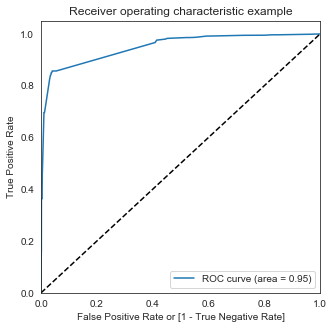

In [181]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


In [182]:
#Finding Optimal Cutoff-point

In [183]:
#Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [184]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.195675,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.062636,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000755,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.787148,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.982365,7987,1,1,1,1,1,1,1,1,1,1,1


In [185]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.719099  0.979967  0.555698
0.2   0.2  0.911510  0.856909  0.945711
0.3   0.3  0.919540  0.856909  0.958771
0.4   0.4  0.920328  0.856909  0.960051
0.5   0.5  0.919068  0.852412  0.960819
0.6   0.6  0.919855  0.849959  0.963636
0.7   0.7  0.917493  0.842191  0.964661
0.8   0.8  0.875768  0.697465  0.987452
0.9   0.9  0.790742  0.464023  0.995391


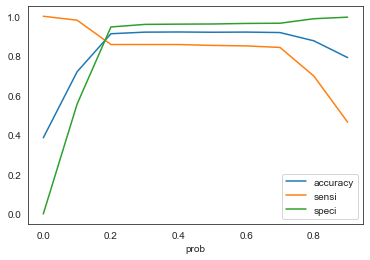

In [186]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [187]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.195675,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.062636,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000755,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.787148,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.982365,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [188]:

#Assigning Lead Score

In [189]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.195675,3009,0,1,1,0,0,0,0,0,0,0,0,0,20
1,0,0.062636,1012,0,1,0,0,0,0,0,0,0,0,0,0,6
2,0,0.000755,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.787148,4750,1,1,1,1,1,1,1,1,1,0,0,1,79
4,1,0.982365,7987,1,1,1,1,1,1,1,1,1,1,1,1,98


In [190]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [191]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.856909239574816

In [192]:
# Let us calculate specificity
TN / float(TN+FP)




0.9457106274007683

In [193]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.05428937259923176


In [194]:
# Positive predictive value 
print (TP / float(TP+FP))


0.9081455805892548


In [195]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9134306208261193


In [196]:
#Precision and Recall

In [197]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3752,  153],
       [ 361, 2085]])

In [198]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9316353887399463

In [199]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8524121013900245

In [200]:
#Using sklearn utilities for the same

In [201]:
from sklearn.metrics import precision_score, recall_score

In [202]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.9316353887399463

In [203]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8524121013900245

In [204]:
#Precision and recall tradeoff

In [205]:
from sklearn.metrics import precision_recall_curve

In [206]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [207]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


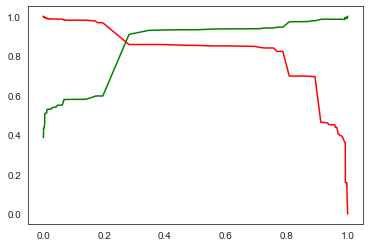

In [208]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


In [209]:
#Making predictions on the test set

In [210]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Magazine,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.432779,-0.160255,-0.155018,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.155018,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,-0.432779,1.643304,-0.155018,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0.643547,2.017593,0.122613,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [211]:
X_test = X_test[col2]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Asymmetrique Activity Index_03.Low,Last Notable Activity_SMS Sent
3271,0,0,0,0,0,0,0,1,0,1,0,0,0
1490,0,0,0,0,0,0,0,1,0,0,0,0,0
7936,0,0,0,0,0,0,0,1,0,1,0,0,0
4216,0,1,0,0,1,0,0,0,0,0,0,0,0
3830,0,0,0,0,0,0,0,1,0,1,0,0,0


In [212]:
X_test_sm = sm.add_constant(X_test)

In [213]:
y_test_pred = res.predict(X_test_sm)

In [214]:
y_test_pred[:10]


3271    0.195675
1490    0.892574
7936    0.195675
4216    0.999370
3830    0.195675
1800    0.892574
6507    0.011356
4821    0.000386
4223    0.997577
4714    0.195675
dtype: float64

In [215]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [216]:
# Let's see the head
y_pred_1.head()

,0
3271,0.195675
1490,0.892574
7936,0.195675
4216,0.999370
3830,0.195675


In [217]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [218]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index


In [219]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [220]:

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [221]:


y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.195675
1,1,1490,0.892574
2,0,7936,0.195675
3,1,4216,0.999370
4,0,3830,0.195675


In [222]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [223]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3271,0.195675
1,1,1490,0.892574
2,0,7936,0.195675
3,1,4216,0.999370
4,0,3830,0.195675


In [224]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)


In [225]:
y_pred_final.head()


,Converted,Prospect ID,Converted_prob,final_predicted
0,0,3271,0.195675,0
1,1,1490,0.892574,1
2,0,7936,0.195675,0
3,1,4216,0.999370,1
4,0,3830,0.195675,0


In [226]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9085567388909291

In [227]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1642,   92],
       [ 157,  832]])

In [228]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [229]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8412537917087968

In [230]:
# Let us calculate specificity
TN / float(TN+FP)

0.9469434832756632

In [231]:
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.9004329004329005

In [232]:
recall_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.8412537917087968

In [233]:
#8. Final Observations and Recommendations

#The Final Evaluation Metrics for the train Dataset:
# - The Accuracy is : 0.80
# - The Sensitivity is : 0.80
# -The Specificity is : 0.81
# - The Precision is : 0.93
# - The Recall is : 0.80
 
    
#The Final Evaluation Metrics for the test Dataset:The Accuracy is : 0.81
# - The Sensitivity is : 0.84
# - The Specificity is : 0.95
# - The Precision is : 0.90
# - The Recall is : 0.84



#X-Education has a better chance of converting a potential lead when:
# - The total time spent on the Website is high: Leads who have spent more time on the website have converted
# - Current Occupation is specified: Leads who are working professionals have high chances of getting converted. People who were looking for better prospects like Unemployed, students, Housewives and Business professionals were also good prospects to focus on.
# - When the Lead origin was Lead Add form Leads who have responded/ or engaged through Lead Add Forms have had a higher chances of getting converted
# - Number of Total Visits were high Leads who have made a greater number of visits have higher chances of getting converted.
# - When the last activity was SMS sent or Email opened Members who have sent an SMS for enquiry or who have opened the email have a higher chance of getting converted.
